![DSA log](figs/dsalogo-Abuja.png)

## Introduction to Data Science - Tutorial

#### Prepared by [Dina Machuve](https://twitter.com/DMachuve) and [Tejumade Afonja](https://twitter.com/tejuafonja)

This tutorial will take you through some of the basic stages of a Data Science project. The stages for End to End Data Science include:
1. **Define the Goal**
2. **Data Preparation**
3. **Feature Selection**
4. Model Training
5. Model Validation
6. Model Deployment

### A. Define the Goal
### Goal: Predict the maternal health delivery services given other attributes

### B. Data Preparation and Exploration
#### Data Source:  Nigeria MDG (Millennium Development Goals) Information System – [NMIS health facility data](https://www.kaggle.com/alaowerre/nigeria-nmis-health-facility-data)

In this part, we will load a dataset provided with this exercise, prepare it by converting to the right types and finally plot it to explore the data.

In [3]:
# Load some common libraries used here
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

#### Using the libraries above write a function to read the dataset.

The filename specified below. The final dataset should be a numpy array.

In [4]:
ORIGINAL_NAME = 'NMIS_Health_Dataset.csv'

In [5]:
#load the dataset
nmisdf = pd.read_csv(ORIGINAL_NAME)
nmisdf.head() #view the first 5 records

,maternal_health_delivery_services,facility_type_display,management,emergency_transport,skilled_birth_attendant,phcn_electricity,c_section_yn,child_health_measles_immun_calc,improved_water_supply,improved_sanitation,vaccines_fridge_freezer,antenatal_care_yn,family_planning_yn,malaria_treatment_artemisinin,num_chews_fulltime,num_nurses_fulltime,num_nursemidwives_fulltime,num_doctors_fulltime,latitude,longitude
0,True,Health Post,public,True,False,True,False,True,False,False,False,True,False,True,1.0,0.0,0.0,0.0,6.543408,9.084703
1,True,Primary Health Centre (PHC),private,True,True,True,False,True,False,True,True,True,False,True,4.0,1.0,1.0,1.0,9.007209,7.677808
2,True,Basic Health Centre / Primary Health Clinic,public,True,True,True,True,True,True,True,True,True,True,True,2.0,4.0,11.0,2.0,5.129700,7.159200
3,True,Primary Health Centre (PHC),public,False,False,False,False,True,True,False,False,True,True,True,2.0,0.0,0.0,0.0,5.463300,8.146400
4,True,Health Post,public,False,False,False,False,True,False,False,False,True,True,True,0.0,0.0,0.0,0.0,5.504000,8.025100


In [16]:
nmisdf.shape  # 20 variables and 34,139 records

(34139, 20)

In [7]:
#list all variables and corresponding data type
nmisdf.dtypes

maternal_health_delivery_services     object
facility_type_display                 object
management                            object
emergency_transport                     bool
skilled_birth_attendant               object
phcn_electricity                      object
c_section_yn                          object
child_health_measles_immun_calc       object
improved_water_supply                 object
improved_sanitation                   object
vaccines_fridge_freezer               object
antenatal_care_yn                     object
family_planning_yn                    object
malaria_treatment_artemisinin         object
num_chews_fulltime                   float64
num_nurses_fulltime                  float64
num_nursemidwives_fulltime           float64
num_doctors_fulltime                 float64
latitude                             float64
longitude                            float64
dtype: object

Convert objects to int

## B1. Descriptive Statistics  From Data

Descriptive statistics can give you great insight into the shape of each attribute. The **describe()** function on the Pandas DataFrame lists 8 statistical properties of each attribute:

* Count
* Mean
* Standard Devaition
* Minimum Value
* 25th Percentile
* 50th Percentile (Median)
* 75th Percentile
* Maximum Value

For example to obtain the statistics summary  for numeric data.

In [8]:
# Statistics on the dataset
nmisdf.describe()

,num_chews_fulltime,num_nurses_fulltime,num_nursemidwives_fulltime,num_doctors_fulltime,latitude,longitude
count,33705.000000,31643.000000,33166.00000,31974.000000,34139.000000,34139.000000
mean,2.076814,0.954366,1.00196,0.589260,8.588811,7.239061
std,3.171834,5.505466,5.78344,4.550893,2.414159,2.386462
min,0.000000,0.000000,0.00000,0.000000,4.281809,2.707818
25%,0.000000,0.000000,0.00000,0.000000,6.596869,5.443072
50%,1.000000,0.000000,0.00000,0.000000,8.031827,7.286000
75%,3.000000,1.000000,1.00000,1.000000,10.489125,8.589357
max,80.000000,513.000000,431.00000,378.000000,13.864973,14.636396


To obtain descriptive statistics of a particular column use:

In [9]:
nmisdf['latitude'].mean()

8.588810566302756

## B2. Handling Missing Data

Real-world data is rarely clean and homogeneous. In particular, many interesting datasets will have some amount of data missing.

Pandas treats **None** and **NaN** as essentially interchangeable for indicating missing or null values.

Pandas Methods for missing values:

* isnull(): Generate a boolean mask indicating missing values
* notnull(): Opposite of isnull()
* dropna(): Return a filtered version of the data
* fillna(): Return a copy of the data with missing values filled or imputed



**Detecting null values**

In [10]:
nmisdf.isnull()

,maternal_health_delivery_services,facility_type_display,management,emergency_transport,skilled_birth_attendant,phcn_electricity,c_section_yn,child_health_measles_immun_calc,improved_water_supply,improved_sanitation,vaccines_fridge_freezer,antenatal_care_yn,family_planning_yn,malaria_treatment_artemisinin,num_chews_fulltime,num_nurses_fulltime,num_nursemidwives_fulltime,num_doctors_fulltime,latitude,longitude
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
## Total missing values in each columns
nmisdf.isnull().sum()

maternal_health_delivery_services     688
facility_type_display                 115
management                           4754
emergency_transport                     0
skilled_birth_attendant               884
phcn_electricity                     4358
c_section_yn                          561
child_health_measles_immun_calc      4788
improved_water_supply                4424
improved_sanitation                    68
vaccines_fridge_freezer              4854
antenatal_care_yn                     666
family_planning_yn                    754
malaria_treatment_artemisinin         663
num_chews_fulltime                    434
num_nurses_fulltime                  2496
num_nursemidwives_fulltime            973
num_doctors_fulltime                 2165
latitude                                0
longitude                               0
dtype: int64

In [12]:
nmisdf.notnull()

,maternal_health_delivery_services,facility_type_display,management,emergency_transport,skilled_birth_attendant,phcn_electricity,c_section_yn,child_health_measles_immun_calc,improved_water_supply,improved_sanitation,vaccines_fridge_freezer,antenatal_care_yn,family_planning_yn,malaria_treatment_artemisinin,num_chews_fulltime,num_nurses_fulltime,num_nursemidwives_fulltime,num_doctors_fulltime,latitude,longitude
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


### Getting rid of missing data points

#### Drop all missing data

``.dropna()``: will drop all rows that have any missing values.

In [13]:
clean_nmisdf = nmisdf.dropna()
clean_nmisdf.isnull()

,maternal_health_delivery_services,facility_type_display,management,emergency_transport,skilled_birth_attendant,phcn_electricity,c_section_yn,child_health_measles_immun_calc,improved_water_supply,improved_sanitation,vaccines_fridge_freezer,antenatal_care_yn,family_planning_yn,malaria_treatment_artemisinin,num_chews_fulltime,num_nurses_fulltime,num_nursemidwives_fulltime,num_doctors_fulltime,latitude,longitude
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
clean_nmisdf.isnull().sum()

maternal_health_delivery_services    0
facility_type_display                0
management                           0
emergency_transport                  0
skilled_birth_attendant              0
phcn_electricity                     0
c_section_yn                         0
child_health_measles_immun_calc      0
improved_water_supply                0
improved_sanitation                  0
vaccines_fridge_freezer              0
antenatal_care_yn                    0
family_planning_yn                   0
malaria_treatment_artemisinin        0
num_chews_fulltime                   0
num_nurses_fulltime                  0
num_nursemidwives_fulltime           0
num_doctors_fulltime                 0
latitude                             0
longitude                            0
dtype: int64

In [17]:
#Size of Clean dataset
clean_nmisdf.shape

(26731, 20)

In [74]:
#Set boolean variables to 1 = True and 0=False
clean_nmisdf.maternal_health_delivery_services=clean_nmisdf.maternal_health_delivery_services.astype(int);
clean_nmisdf.skilled_birth_attendant=clean_nmisdf.skilled_birth_attendant.astype(int);
clean_nmisdf.phcn_electricity=clean_nmisdf.phcn_electricity.astype(int);
clean_nmisdf.c_section_yn=clean_nmisdf.c_section_yn.astype(int);
clean_nmisdf.improved_water_supply=clean_nmisdf.improved_water_supply.astype(int);
clean_nmisdf.vaccines_fridge_freezer=clean_nmisdf.vaccines_fridge_freezer.astype(int);
clean_nmisdf.antenatal_care_yn=clean_nmisdf.antenatal_care_yn.astype(int);
clean_nmisdf.malaria_treatment_artemisinin=clean_nmisdf.malaria_treatment_artemisinin.astype(int);

/home/dmachuve/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [77]:
#Save it for future use
clean_nmisdf.to_csv("clean_data.csv", encoding='utf-8', index=False)

In [78]:
data = pd.read_csv("clean_data.csv")
data.head(5)

,maternal_health_delivery_services,facility_type_display,management,emergency_transport,skilled_birth_attendant,phcn_electricity,c_section_yn,child_health_measles_immun_calc,improved_water_supply,improved_sanitation,vaccines_fridge_freezer,antenatal_care_yn,family_planning_yn,malaria_treatment_artemisinin,num_chews_fulltime,num_nurses_fulltime,num_nursemidwives_fulltime,num_doctors_fulltime,latitude,longitude
0,1,Health Post,public,True,0,1,0,True,0,False,0,1,False,1,1.0,0.0,0.0,0.0,6.543408,9.084703
1,1,Primary Health Centre (PHC),private,True,1,1,0,True,0,True,1,1,False,1,4.0,1.0,1.0,1.0,9.007209,7.677808
2,1,Basic Health Centre / Primary Health Clinic,public,True,1,1,1,True,1,True,1,1,True,1,2.0,4.0,11.0,2.0,5.129700,7.159200
3,1,Primary Health Centre (PHC),public,False,0,0,0,True,1,False,0,1,True,1,2.0,0.0,0.0,0.0,5.463300,8.146400
4,1,Health Post,public,False,0,0,0,True,0,False,0,1,True,1,0.0,0.0,0.0,0.0,5.504000,8.025100


#### Filling null values

Sometimes rather than dropping NA values, you'd rather replace them with a valid value. This value might be a single number like zero, or it might be some sort of imputation or interpolation from the good values

### C. Feature Selection 

Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.

Having too many irrelevant features in your data can decrease the accuracy of the models. 

Three benefits of performing feature selection before modeling your data are:

* Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
* Improves Accuracy: Less misleading data means modeling accuracy improves.
* Reduces Training Time: Less data means that algorithms train faster.

You can use the following approach

- Univariate statistics
- Model-base selection
- Iterative selection


**Univariate statistics** 
- Check statistical significance relation between feature and target.
- Select the one with high confidence

Advantage: Very fast to compute, doesnt require building models

Disadvantage: Independent of the model

**Model-based Feature Selection**
- Use a supervised machine learning model to judge the importance of each feature.

Advantages: Consider all features at once.

**Iterative Feature Selection**
A series of models are built with varying number of features. Implemented in Sklearn as [Recursive feature elimination (RFE)](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE)

### Model - based Feature Selection : Using Feature Importance

Using RandomForest Classifier

In [18]:
# Load the packages for modeling
from sklearn.ensemble import RandomForestClassifier

In [19]:
# Define a classifier
rforest = RandomForestClassifier(max_depth=15,n_estimators=70, min_samples_leaf=50,
                                  min_samples_split=100, random_state=10)

In [79]:
#Load clean data
data = pd.read_csv("clean_data.csv")
data.head(5)

,maternal_health_delivery_services,facility_type_display,management,emergency_transport,skilled_birth_attendant,phcn_electricity,c_section_yn,child_health_measles_immun_calc,improved_water_supply,improved_sanitation,vaccines_fridge_freezer,antenatal_care_yn,family_planning_yn,malaria_treatment_artemisinin,num_chews_fulltime,num_nurses_fulltime,num_nursemidwives_fulltime,num_doctors_fulltime,latitude,longitude
0,1,Health Post,public,True,0,1,0,True,0,False,0,1,False,1,1.0,0.0,0.0,0.0,6.543408,9.084703
1,1,Primary Health Centre (PHC),private,True,1,1,0,True,0,True,1,1,False,1,4.0,1.0,1.0,1.0,9.007209,7.677808
2,1,Basic Health Centre / Primary Health Clinic,public,True,1,1,1,True,1,True,1,1,True,1,2.0,4.0,11.0,2.0,5.129700,7.159200
3,1,Primary Health Centre (PHC),public,False,0,0,0,True,1,False,0,1,True,1,2.0,0.0,0.0,0.0,5.463300,8.146400
4,1,Health Post,public,False,0,0,0,True,0,False,0,1,True,1,0.0,0.0,0.0,0.0,5.504000,8.025100


In [80]:
# Prepare Feature and Target
data.columns

Index(['maternal_health_delivery_services', 'facility_type_display',
       'management', 'emergency_transport', 'skilled_birth_attendant',
       'phcn_electricity', 'c_section_yn', 'child_health_measles_immun_calc',
       'improved_water_supply', 'improved_sanitation',
       'vaccines_fridge_freezer', 'antenatal_care_yn', 'family_planning_yn',
       'malaria_treatment_artemisinin', 'num_chews_fulltime',
       'num_nurses_fulltime', 'num_nursemidwives_fulltime',
       'num_doctors_fulltime', 'latitude', 'longitude'],
      dtype='object')

In [83]:
feature = ['skilled_birth_attendant',  'phcn_electricity', 'c_section_yn', 
           'improved_water_supply', 'vaccines_fridge_freezer','antenatal_care_yn', 
           'malaria_treatment_artemisinin','num_nurses_fulltime','num_nursemidwives_fulltime',
          'num_doctors_fulltime']

In [84]:
X = data[feature]
y = data.maternal_health_delivery_services

In [85]:
# Fit the model
rforest.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

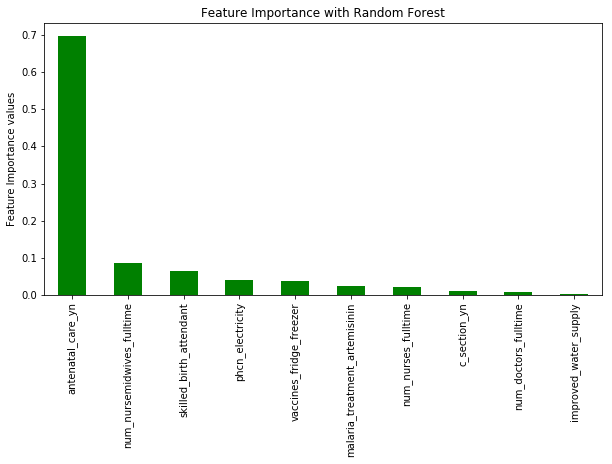

In [86]:
# Plot the important features
imp_feat_rf = pd.Series(rforest.feature_importances_, index=X.columns).sort_values(ascending=False)
imp_feat_rf.plot(kind='bar', title='Feature Importance with Random Forest', figsize=(10,6),color='g')
plt.ylabel('Feature Importance values')
plt.subplots_adjust(bottom=0.25)

## Model - based feature Selection : Using **SelectFromModel**

In [87]:
from sklearn.feature_selection import SelectFromModel

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42) , threshold="median")

In [88]:
select.fit(X,y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold='median')

In [89]:
X_features = select.transform(X)
print('Original features', X.shape)
print('Selected features', X_features.shape)

Original features (26731, 10)
Selected features (26731, 5)



#### Print selected features

In [91]:
for feature_list_index in select.get_support(indices=True):
    print(feature[feature_list_index])

skilled_birth_attendant
vaccines_fridge_freezer
antenatal_care_yn
num_nurses_fulltime
num_nursemidwives_fulltime
